In [11]:
import pandas as pd

# Movement data
data = pd.read_excel("other-airports.xls", header=2)
data_other = pd.DataFrame(data, columns=["Code", "Pax 2017"]).rename(columns={"Pax 2017": "Passengers"})

data = pd.read_excel("american-airport.xls", header=2, sheet_name="2017 pax")
data_america = pd.DataFrame(data, columns=["Code", "Pax 2016"]).rename(columns={"Pax 2016": "Passengers"})

data = pd.read_excel("european-airports.xls", header=2)
data_europe = pd.DataFrame(data, columns=["Code", "Pax 2017"]).rename(columns={"Pax 2017": "Passengers"})

dataset = data_other.append(data_america).append(data_europe)

# dataset[dataset['Code'].isnull()]
dataset = dataset.dropna();
dataset = dataset.sort_values(by=["Code"])

dataset["Passengers"] = dataset["Passengers"]

passengerSet = dataset

# dataset["Passengers"].sort_values()
len(passengerSet)


816

In [97]:
# Airports and routes
data = pd.read_csv("airports.dat", header=-1)
airports = pd.DataFrame(data, columns=[0, 4]).rename(columns={0: "Id", 4: "Code"})
airports = airports[airports.Code != "\\N"]

data = pd.read_csv("routes.dat", header=-1)
routes = pd.DataFrame(data, columns=[2, 4]).rename(columns={2: "From", 4: "To"})


In [98]:
# Creating network graph

import networkx as nx

tuples = [tuple(x) for x in routes.values]

G = nx.Graph()
G.add_edges_from(tuples)

In [99]:

def lookupNode(name):
    airport = passengerSet[passengerSet.Code == name]
    if (len(airport.Code) > 0):
        return airport.iat[0, 1]
    else:
        return 0

passengerFlow = [lookupNode(node) for node in G.nodes()]


In [110]:
# Getting degree values
import math

centr_val = [node for _, node in G.degree()]


<IPython.core.display.Javascript object>


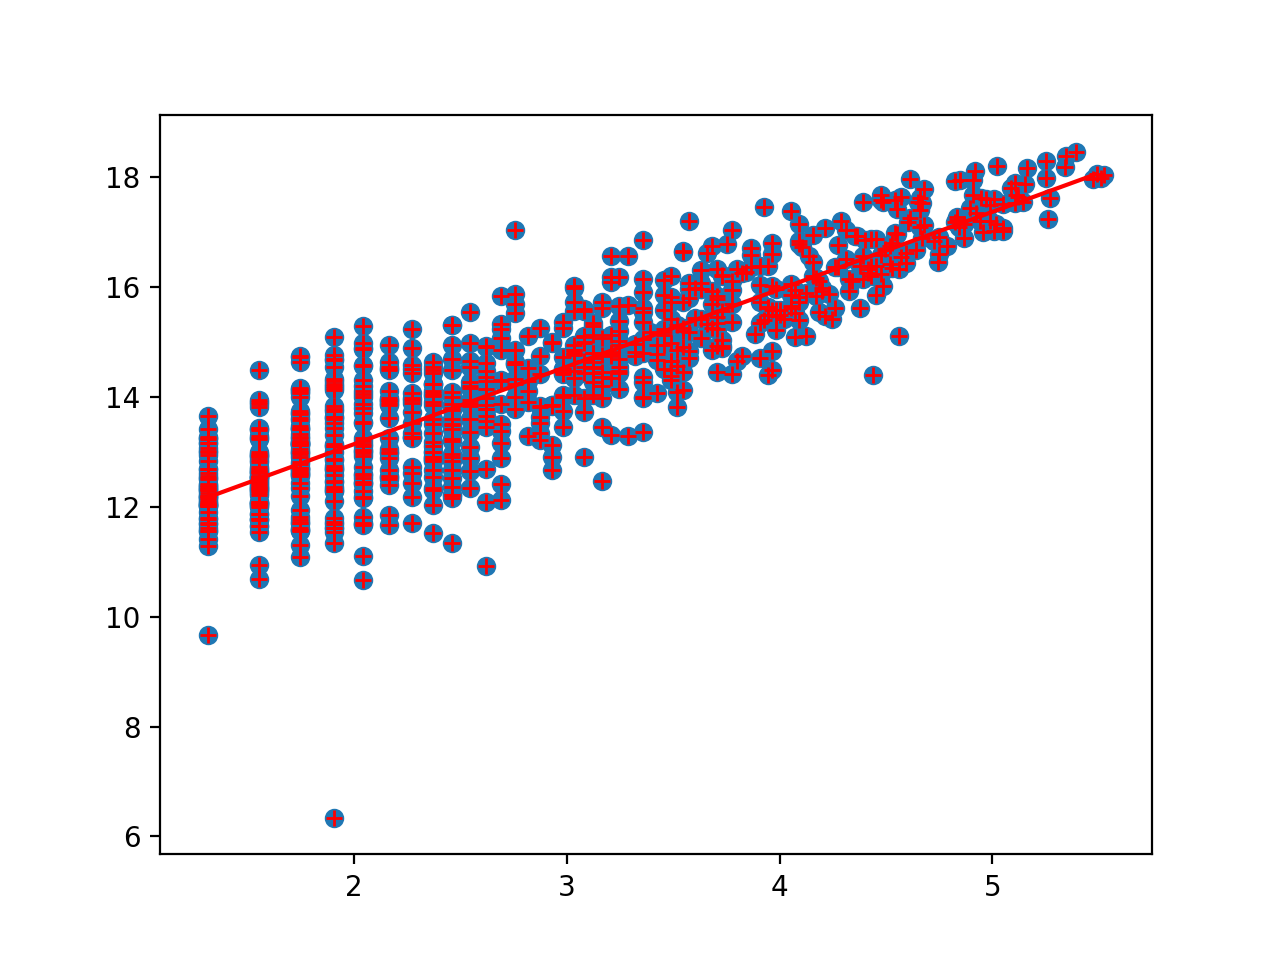

In [151]:
# Creating a mathematical relation between passenger flow and degree
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

flowDegree = [(flow, degree) for flow, degree in zip(passengerFlow, centr_val) if (flow != 0)]

flowDegreeList = list(zip(*flowDegree))

xPoints = [math.sqrt(x) for x in flowDegreeList[0]] # Number of passengers
yPoints = [pow(math.e, y) for y in flowDegreeList[1]]          # Degree

xPoints = [math.log((x+math.e)) for x in flowDegreeList[1]] # Degree
yPoints = [math.log((y)) for y in flowDegreeList[0]] # Number of passengers          


plt.plot(xPoints, yPoints, 'r+')


<IPython.core.display.Javascript object>


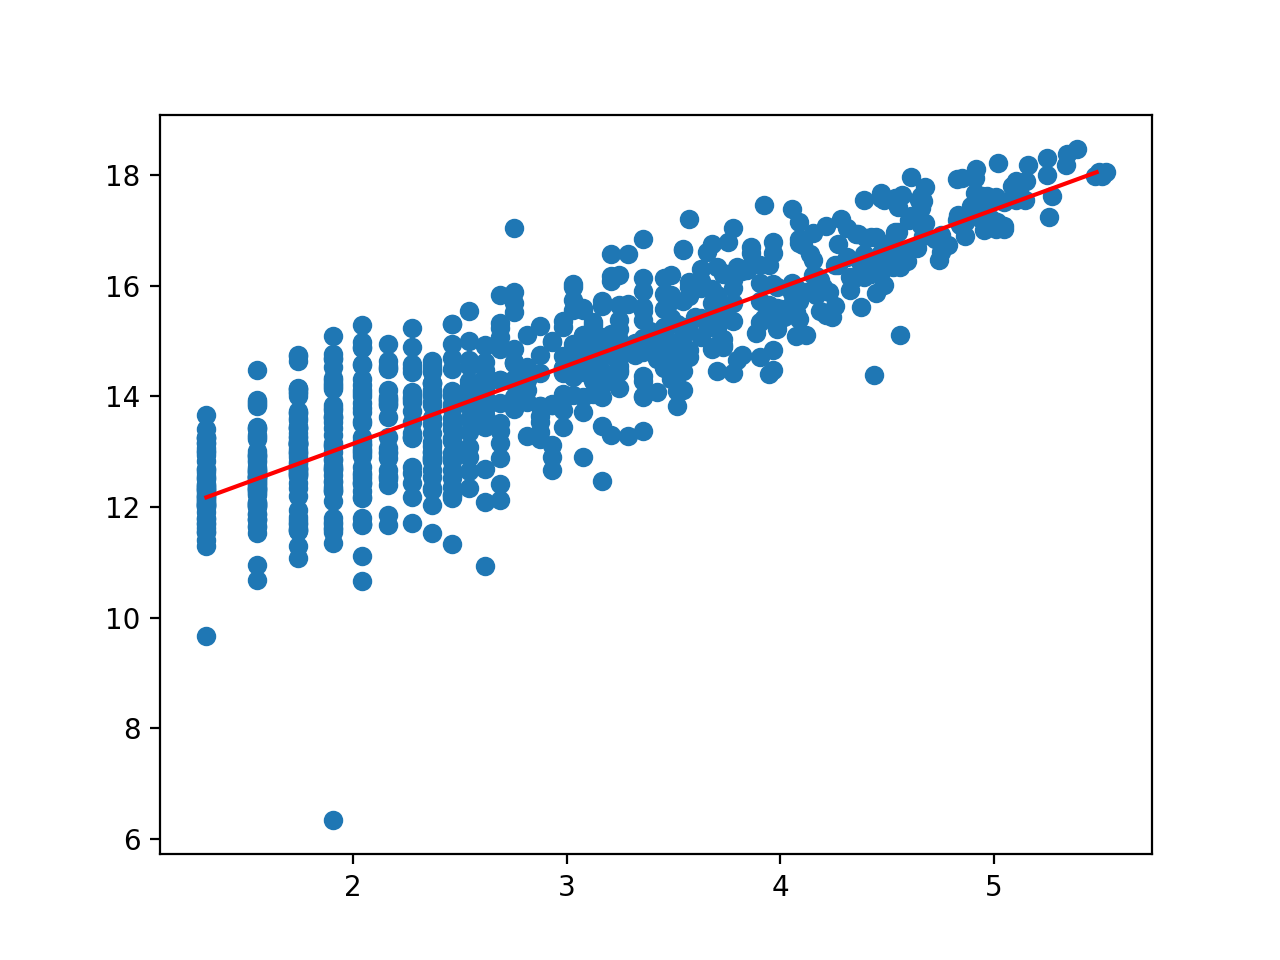

In [153]:
# Linear regression
import numpy as np

x = np.array(xPoints)
y = np.array(yPoints)

def getlinear(x,y):
 
    def inner(x1):
        return m * x1 + b
    
    m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) * np.sum(x))
    b = (np.sum(y) - m *np.sum(x)) / len(x)
    return inner

linReg = getlinear(x,y)

# plt.ylabel("sqrt(#passengers per year)")
# plt.xlabel("e^degree")

maxX = np.max(x)
minX = np.min(x)
distX = maxX - minX
xRange = np.array([minX + x * distX/100 for x in range(100)])


plt.scatter(x, y)
plt.plot(xRange, linReg(xRange), color="red")

